In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle, wrangle_mode
from acquire import acquire
from functions import create_heatmap, explore_univariate, explore_bivariate, explore_multivariate
import warnings
warnings.filterwarnings("ignore")

In [2]:
train, validate, test = wrangle()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28210 entries, 17275 to 63558
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bath                   28210 non-null  float64
 1   bed                    28210 non-null  float64
 2   area                   28210 non-null  float64
 3   lat                    28210 non-null  float64
 4   long                   28210 non-null  float64
 5   lot_size               28210 non-null  float64
 6   year                   28210 non-null  float64
 7   tax_value              28210 non-null  float64
 8   tax_amount             28210 non-null  float64
 9   logerror               28210 non-null  float64
 10  heating_type           28210 non-null  object 
 11  county                 28210 non-null  object 
 12  price_per_sqft         28210 non-null  float64
 13  bath_scaled            28210 non-null  float64
 14  bed_scaled             28210 non-null  float64
 15

In [12]:
ventura = train[train.county == 'Ventura'].price_per_sqft.mean()
LA = train[train.county == 'Los Angeles'].price_per_sqft.mean()
Orange = train[train.county == 'Orange'].price_per_sqft.mean()

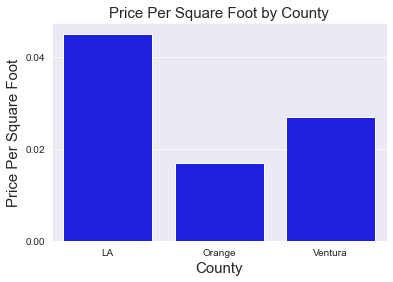

In [33]:
County = ['LA', 'Orange', 'Ventura']
Price_per_sqft = [LA, Orange, ventura]
ax = sns.barplot(County, Price_per_sqft, color='blue')

ax.set_xlabel('County',fontsize = 15, )
ax.set_ylabel('Price Per Square Foot',fontsize = 15)
ax.set_title('Price Per Square Foot by County', fontsize = 15)
sns.set(font_scale = 2)
ax.set(xlabel='County', ylabel='Price Per Square Foot')
plt.show()

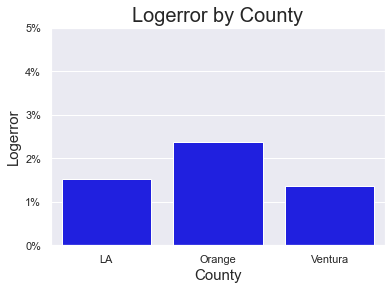

In [57]:
ventura = train[train.county == 'Ventura'].logerror.mean()
LA = train[train.county == 'Los Angeles'].logerror.mean()
Orange = train[train.county == 'Orange'].logerror.mean()

County = ['LA', 'Orange', 'Ventura']
Price_per_sqft = [LA, Orange, ventura]
ax = sns.barplot(County, Price_per_sqft, color='blue')

ax.set_xlabel('County',fontsize = 15, )
ax.set_ylabel('Price Per Square Foot',fontsize = 15)
ax.set_title('Logerror by County', fontsize = 20)
sns.set(font_scale = 1)
ax.yaxis.set_major_formatter('{:.000%}'.format)
plt.ylim(0, .05)
ax.set(xlabel='County', ylabel='Logerror')
plt.show()

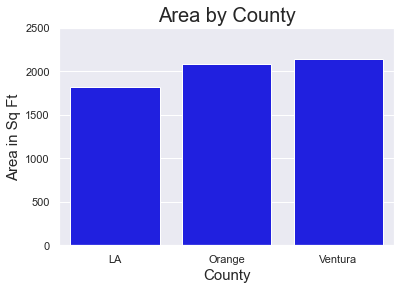

In [70]:
ventura = train[train.county == 'Ventura'].area.mean()
LA = train[train.county == 'Los Angeles'].area.mean()
Orange = train[train.county == 'Orange'].area.mean()

County = ['LA', 'Orange', 'Ventura']
Price_per_sqft = [LA, Orange, ventura]
ax = sns.barplot(County, Price_per_sqft, color='blue')

ax.set_xlabel('County',fontsize = 15, )
ax.set_ylabel('Price Per Square Foot',fontsize = 15)
ax.set_title('Area by County', fontsize = 20)
sns.set(font_scale = 1)
plt.ylim(0, 2500)
ax.set(xlabel='County', ylabel='Area in Sq Ft')
plt.show()

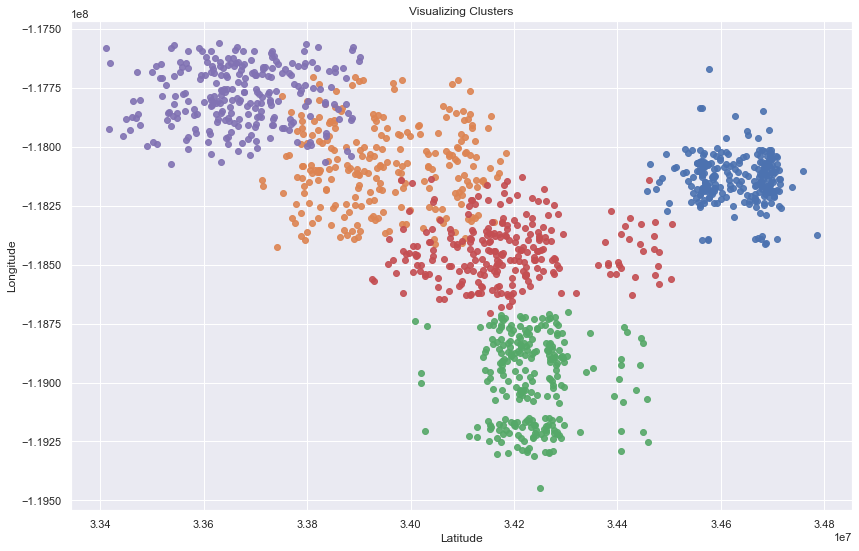

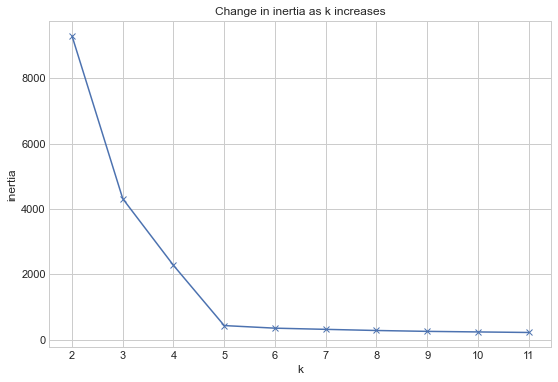

In [81]:
pd.reset_option('display.float_format')
X = train[["lat","long", 'area', "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=5, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.lat.sample(250), subset.long.sample(250), label='cluster ' + str(cluster), alpha=.9, cmap='reds')
    

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Visualizing Clusters')
# plt.ticklabel_format(style='plain', axis='x')

plt.show()

centroids = train.groupby('cluster')["lat","long", 'area', "price_per_sqft"].mean()
centroids

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [82]:
# Train
X_train = train[['bed_scaled','bath_scaled','tax_amount_scaled','cluster_0', 'cluster_2', 'cluster_3']]
y_train = train['logerror']

# Validate
X_validate = validate[['bed_scaled', 'bath_scaled','tax_amount_scaled','cluster_0', 'cluster_2', 'cluster_3']]
y_validate = validate['logerror']

# Test
X_test = test[['bed_scaled', 'bath_scaled','tax_amount_scaled','cluster_0', 'cluster_2', 'cluster_3']]
y_test =  test['logerror']

In [83]:
y_train = train['logerror']
y_train  = pd.DataFrame(y_train)

y_validate = validate['logerror']
y_validate  = pd.DataFrame(y_validate)

y_test = test['logerror']
y_test  = pd.DataFrame(y_test)

In [84]:
# Make the model
lm = LinearRegression(normalize=True)

# Target to variable
target = y_train.columns[0]

# Fit the model
lm.fit(X_train, y_train[target])

# Use the model

# Train
y_train[target+'_pred_lm'] = lm.predict(X_train)
rmse_train = mean_squared_error(y_train[target], y_train[target+'_pred_lm']) ** (1/2)

# Validate
y_validate[target+'_pred_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate[target], y_validate[target+'_pred_lm']) ** (1/2)

# Test
y_test[target+'_pred_lm'] = lm.predict(X_test)
rmse_test = mean_squared_error(y_test[target], y_test[target+'_pred_lm']) ** (1/2)

rmse_test

0.17963171754470317

In [85]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10075 entries, 29656 to 51162
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   logerror          10075 non-null  float64
 1   logerror_pred_lm  10075 non-null  float64
dtypes: float64(2)
memory usage: 236.1 KB


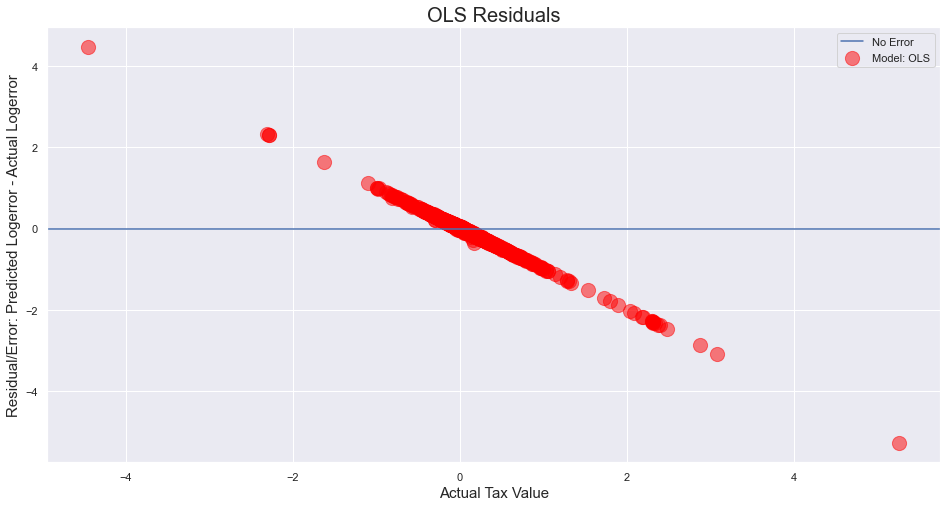

In [91]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_test.logerror, (y_test.logerror_pred_lm-y_test.logerror), 
            alpha=.5, color="red", s=200, label="Model: OLS")

plt.legend()
plt.xlabel("Actual Tax Value", fontsize = 15)
plt.ylabel("Residual/Error: Predicted Logerror - Actual Logerror", fontsize =15)
plt.title("OLS Residuals", fontsize=20)
plt.show()